In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

# Regression Evaluation Exercises

## 1

Load the tips dataset from either pydataset or seaborn.

In [2]:
tips = data('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


## 2

Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [6]:
from sklearn.linear_model import LinearRegression

# Who needs to split data?
X = tips[['total_bill']]
y = tips['tip']

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [9]:
predictions

array([2.70463616, 2.00622312, 3.12683472, 3.40725019, 3.5028225 ,
       3.57633966, 1.84133463, 3.74332864, 2.49983836, 2.47253198,
       1.99887141, 4.6234341 , 2.53974767, 2.85587147, 2.47778321,
       3.1866987 , 2.00517288, 2.631119  , 2.70253567, 3.0890259 ,
       2.80230897, 3.05121707, 2.57650625, 5.06033609, 3.00185555,
       2.79075627, 2.32444741, 2.25303074, 3.19930164, 2.98400138,
       1.92325375, 2.84746951, 2.50193885, 3.09322688, 2.78760553,
       3.4471595 , 2.63321949, 2.69833469, 2.88317784, 4.20438627,
       2.60486287, 2.75399769, 2.38431139, 1.93690694, 4.11301494,
       2.84116804, 3.25496464, 4.32306398, 3.91871958, 2.81491191,
       2.23727706, 2.0009719 , 4.57617306, 1.96421332, 3.60469628,
       2.96719746, 4.91225152, 3.69396712, 2.10074519, 5.98980307,
       3.05121707, 2.3706582 , 2.0776398 , 2.84116804, 2.76765087,
       3.02916192, 2.64792292, 1.24269488, 3.0449156 , 2.49668762,
       2.18266431, 2.71303813, 3.74122815, 3.57528941, 2.46728

## 3

Plot the residuals for the linear regression model that you made.

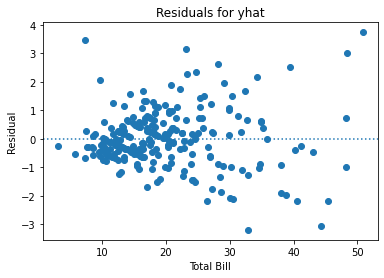

In [34]:
residuals = y - predictions
plt.scatter(X, residuals)
plt.axhline(0, ls = ':')
plt.xlabel('Total Bill')
plt.ylabel('Residual')
plt.title('Residuals for yhat');

## 4

Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [12]:
from sklearn.metrics import mean_squared_error

In [14]:
MSE = mean_squared_error(y, predictions)
MSE

1.036019442011377

In [16]:
SSE = MSE * len(tips)
SSE

252.788743850776

In [17]:
RMSE = mean_squared_error(y, predictions, squared = False)
RMSE

1.0178504025697377

In [19]:
ESS = sum((predictions - y.mean()) ** 2)
ESS

212.4237331984042

In [20]:
TSS = SSE + ESS
TSS

465.21247704918017

## 5

Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [24]:
baseline = y.mean()
baseline

2.9982786885245902

In [25]:
tips['baseline'] = baseline

In [26]:
MSE = mean_squared_error(y, tips['baseline'])
MSE

1.906608512496641

In [28]:
SSE = MSE * len(tips)
SSE

465.2124770491804

In [30]:
RMSE = mean_squared_error(y, tips['baseline'], squared = False)
RMSE

1.3807999538298954

## 6

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [35]:
MSE_baseline = mean_squared_error(y, tips['baseline'])
SSE_baseline = MSE_baseline * len(tips)

MSE_model = mean_squared_error(y, predictions)
SSE_model = MSE_model * len(tips)

if SSE_model < SSE_baseline:
    print('The model performs better than the baseline.')
else:
    print('The model does not perform better than the baseline.')

The model performs better than the baseline.


## 7

What is the amount of variance explained in your model?